In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("C:\\Users\\franc\\Downloads\\house_price(1).csv")
df



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
df.shape

(13200, 7)

In [8]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [9]:
columns_to_drop = ['location', 'size','bath']
df_dropped = df.drop(columns=columns_to_drop)


In [10]:
df_dropped

,total_sqft,price,bhk,price_per_sqft
0,1056.0,39.07,2,3699
1,2600.0,120.00,4,4615
2,1440.0,62.00,3,4305
3,1521.0,95.00,3,6245
4,1200.0,51.00,2,4250
...,...,...,...,...
13195,3453.0,231.00,5,6689
13196,3600.0,400.00,4,11111
13197,1141.0,60.00,2,5258
13198,4689.0,488.00,4,10407


In [12]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [11]:
df_dropped.loc[df_dropped.duplicated()].head()

,total_sqft,price,bhk,price_per_sqft
129,1600.0,75.00,3,4687
154,1200.0,50.00,2,4166
236,1060.0,60.00,2,5660
239,645.0,16.45,1,2550
242,1200.0,90.00,3,7500


In [ ]:
df.loc[df.duplicated()].head()

In [12]:
df=df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [14]:
m=df['price_per_sqft'].mean()
m

8132.641840177763

# percentile method

In [15]:
q1=df.price_per_sqft.quantile(.25)
q1

4312.0

In [16]:
q3=df.price_per_sqft.quantile(.75)
q3

7461.0

In [17]:
df_no_outlier=df[df.price_per_sqft<df.price_per_sqft.quantile(.80)]

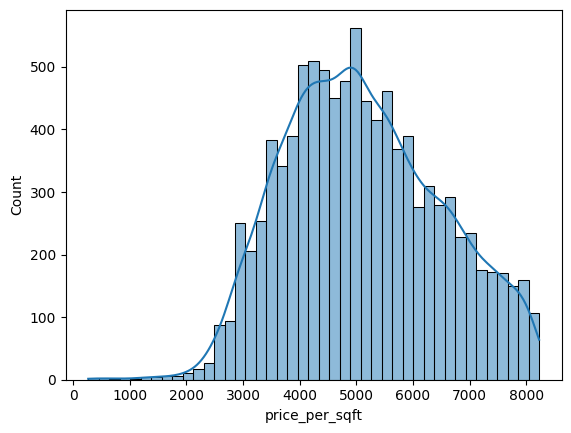

In [18]:
sns.histplot(data=df_no_outlier,x=df_no_outlier['price_per_sqft'],kde=True)
plt.show()

# IQR method

In [19]:
iqr=q3=q1
iqr

4312.0

In [20]:
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
df[(df.price_per_sqft<lower)|(df.price_per_sqft>upper)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250


In [22]:
df_without_outliers=df[(df.price_per_sqft>lower) & (df.price_per_sqft<upper)].head()
df_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


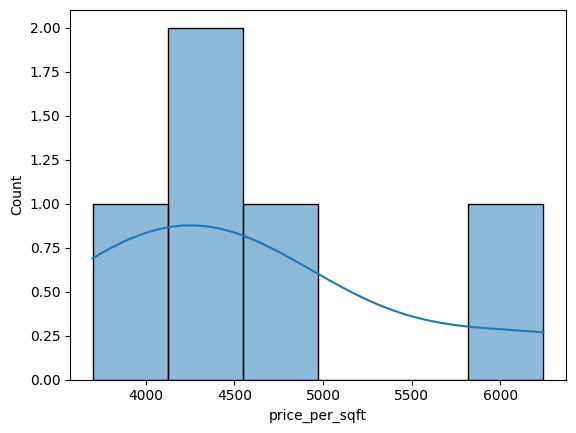

In [24]:
sns.histplot(data=df_without_outliers,x=df_without_outliers['price_per_sqft'],kde=True)
plt.show()

In [25]:
#to calculate skewness
from scipy.stats import skew,kurtosis

In [27]:
kurtosis(df_without_outliers['price_per_sqft'],fisher= False)

2.7684803753637928

# z score method

In [33]:
m=df.price_per_sqft.mean()
s=df.price_per_sqft.std()
lower=m-3*s
upper=m+3*s

In [34]:
df['z_score']=(df.price_per_sqft-m)/s

In [38]:
# outliers
df[(df.price_per_sqft<lower)|(df.price_per_sqft>upper)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
344,other,3 Bedroom,11.0,3.0,74.0,3,672727,5.974800
1098,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.545728
3920,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,107.808636
4744,other,7 BHK,5.0,7.0,115.0,7,2300000,20.604222
10632,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.193303


In [40]:
df1=df[(df.price_per_sqft>lower)&(df.price_per_sqft<upper)].head()
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906


<Axes: xlabel='price_per_sqft', ylabel='Count'>

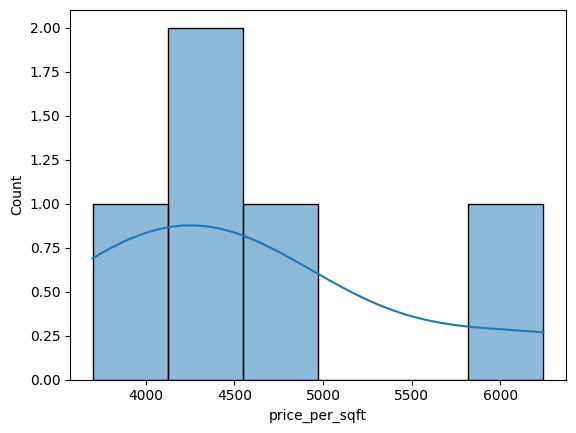

In [42]:
sns.histplot(data=df1,x=df1['price_per_sqft'],kde=True)

In [43]:
df1['price_per_sqft'].skew()

1.5748387702646338

In [44]:
kurtosis(df1['price_per_sqft'],fisher=False)

2.7684803753637928

# box plot

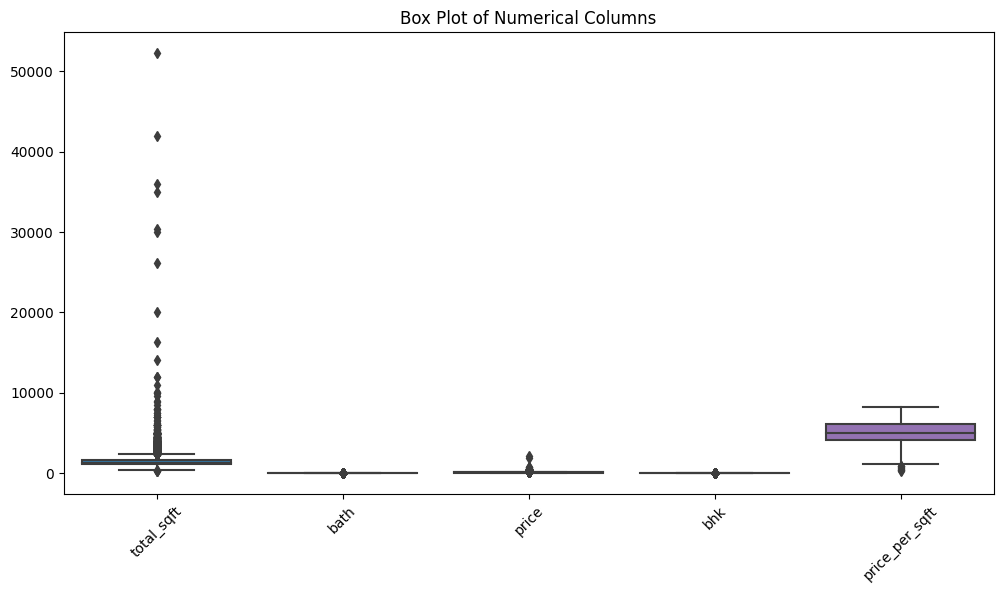

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_outlier)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [64]:
df.dropna()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
12147,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
12148,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


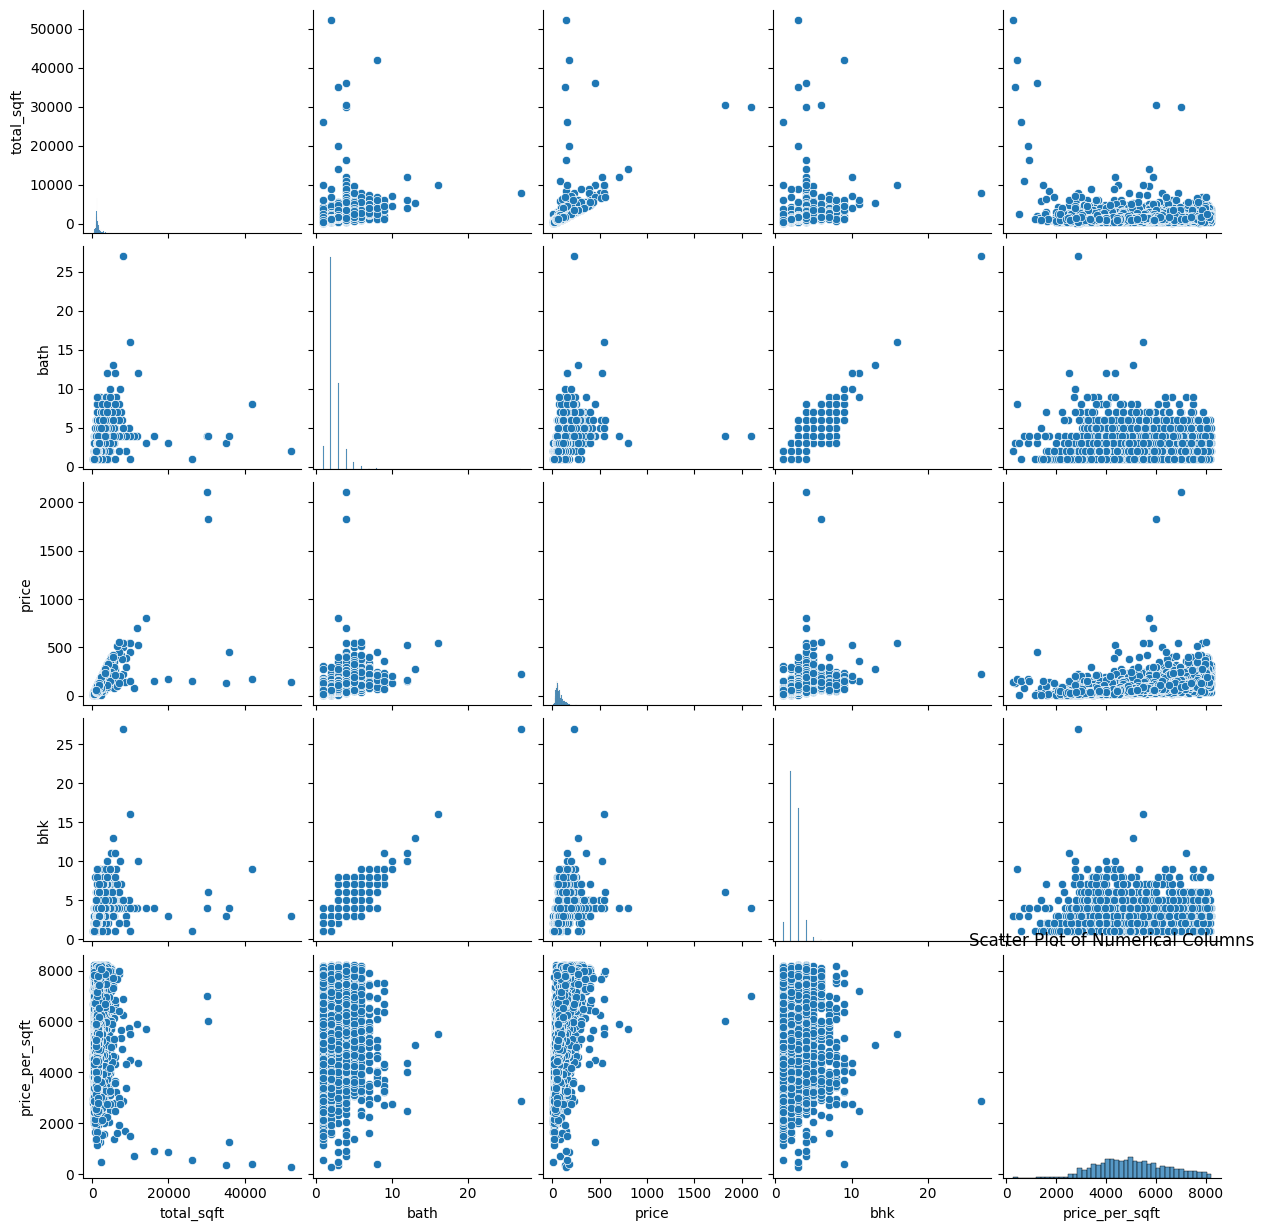

In [53]:
# Scatter plot
sns.pairplot(df_no_outlier)
plt.title('Scatter Plot of Numerical Columns')
plt.show()

In [58]:
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
df_without_outliers=df[(df.price_per_sqft>lower) & (df.price_per_sqft<upper)].head()

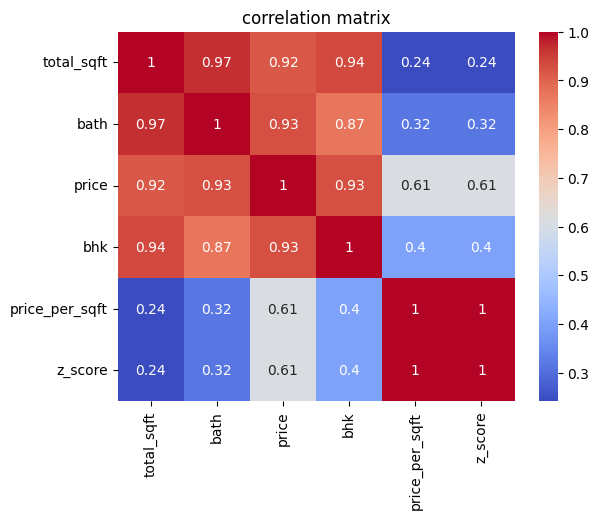

In [74]:
numeric_columns = df_without_outliers.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot =True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
